In [486]:
#Task 1: Gathering Reviews (a note)
#For 2 of the apps the number of reviews needed to be capped at 10,000 as my scapping tool would time out if I tried 
#to scrap every review for Wikipedia and Quora applications. For the remaining 9 apps this was not a problem as
#they did not have that many reviews.

In [487]:
#Task2: Preproccessing Text
#Import CSV Assigned App
import pandas as pd
pd.options.mode.chained_assignment = None
appID = 'org.wikipedia'
df = pd.read_csv('../Project/'+appID+'.csv')

In [488]:
#I.Remove Punctuations
#II.Remove Special Characters and Emojis
import re
for index, row in df.iterrows():
    text = str(df['ReviewerText'].iloc[index])
    df['ReviewerText'].iloc[index] = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

In [489]:
#III.Turn Numbers into Text
import inflect
p = inflect.engine()

for index, row in df.iterrows():
    buildstr=""
    temp = df['ReviewerText'].iloc[index]
    temp = temp.split()
    for x in temp:
        if x.isdigit():
            num = p.number_to_words(x)
            buildstr += (num + " ")
        else:
            buildstr += (x + " ")
    df['ReviewerText'].iloc[index] = buildstr   

In [490]:
#IV.Remove Extra White Spaces
df['ReviewerText'] = df['ReviewerText'].replace(r'\n',' ', regex=True)

#V.Turn All Words into Lowercase
df['ReviewerText'] = df['ReviewerText'].str.lower()

In [491]:
#VI.Remove Stop Words
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['ReviewerText'] = df['ReviewerText'].apply(lambda x: " ".join([item for item in x.split() if item.lower() not in stop]))

In [492]:
#VII.Lemmatize Reviews
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for index, row in df.iterrows():
    buildstr=""
    temp = df['ReviewerText'].iloc[index]
    temp = temp.split()
    for x in temp:
        lemmaWord = lemmatizer.lemmatize(x)
        buildstr += (lemmaWord + " ")
    df['ReviewerText'].iloc[index] = buildstr

In [493]:
#VIII.Output 15 Sample Pre-processed Reviews as a Table
table = df[['PackageName','ReviewerName','ReviewerRating','ReviewerText']]
result=table.head(15)
display(result) 

#Output Just the Reviewer Text in Full:
for i in range(min(15,len(df))):
    print(df['ReviewerText'][i])

,PackageName,ReviewerName,ReviewerRating,ReviewerText
0,org.wikipedia,A Google user,5,wikipedia come back turkey
1,org.wikipedia,A Google user,5,
2,org.wikipedia,A Google user,5,offline read
3,org.wikipedia,A Google user,5,lot information scholar
4,org.wikipedia,A Google user,5,best app
5,org.wikipedia,A Google user,1,chalta e na
6,org.wikipedia,A Google user,5,hello old friend
7,org.wikipedia,A Google user,5,perfect app get information
8,org.wikipedia,A Google user,5,one favourite website become one favourite app...
9,org.wikipedia,A Google user,3,loved wikipedia app seems push lot american fo...


wikipedia come back turkey 

offline read 
lot information scholar 
best app 
chalta e na 
hello old friend 
perfect app get information 
one favourite website become one favourite apps really sure need internet anymore 
loved wikipedia app seems push lot american football information definitely want see much point far 
careful time wikileaks pedia erdogan 
help u find looking ex project school even work help u understand 
one star wikipedia removed favorite feature place please bring back 
best app collect information world creature want 
love read random stuff love app browser home page wikipedia previously find page feature however added five star 


In [494]:
#BONUS of TASK 2: 
#The choice of stop words does have an impact on the analysis of reviews as this will affect the words remaining 
#after stop-words are removed. If we remove words that help convey sentiment then we will miss these 
#positive/negative sentiments in our analysis. When choosing stop words to remove we want to remove very common 
#words that are unlikely to change the meaning of the text. This allows us to focus on important information.
#A pro of using a non-customized list is that the list is already made for use and contains many stop words. 
#A con (the risk of using a non-customized list of stop words) is that the stop words might change the entire 
#sentiment of a sentence and give us incorrect results by removing words that need to be analyzed in our 
#specific sentiment analysis context. For example, before removing stop-words: "The app is not good" 
#and after:"app good". This results in an entirely different, now positive sentiment, if we just make use 
#of the non-customized list of stop-words.

In [495]:
#Task 3: Sentiment Analysis
#I.Using Textblob to Calculate Reviews Sentiment
# %pip install textblob
from textblob import TextBlob
polarityList = []
for index, row in df.iterrows():
    text = str(df['ReviewerText'].iloc[index])
    testimonial = TextBlob(text)
    polarityList.append(testimonial.sentiment.polarity)
df['Polarity'] = polarityList
table = df[['PackageName','ReviewerText','Polarity']]

pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', 250)
result=table.head(250)
#II.Output - Table with Headers for Textblob Analysis
display(result)

,PackageName,ReviewerText,Polarity
0,org.wikipedia,wikipedia come back turkey,0.0000
1,org.wikipedia,,0.0000
2,org.wikipedia,offline read,0.0000
3,org.wikipedia,lot information scholar,0.0000
4,org.wikipedia,best app,1.0000
5,org.wikipedia,chalta e na,0.0000
6,org.wikipedia,hello old friend,0.1000
7,org.wikipedia,perfect app get information,1.0000
8,org.wikipedia,one favourite website become one favourite app...,0.5000
9,org.wikipedia,loved wikipedia app seems push lot american fo...,0.2000


In [496]:
#III.Using Vader to Calculate Reviews Sentiment
# %pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
compoundList = []
sid_obj = SentimentIntensityAnalyzer()

for index, row in df.iterrows():
    text = str(df['ReviewerText'].iloc[index])
    sentiment_dict = sid_obj.polarity_scores(text)
    compoundList.append(sentiment_dict['compound'])
df['Polarity'] = compoundList
table = df[['PackageName','ReviewerText','Polarity']]

pd.set_option('display.max_rows', 250)
result=table.head(250)
#IV.Output - Table with Headers for Vader Analysis
display(result)

,PackageName,ReviewerText,Polarity
0,org.wikipedia,wikipedia come back turkey,0.0000
1,org.wikipedia,,0.0000
2,org.wikipedia,offline read,-0.1280
3,org.wikipedia,lot information scholar,0.0000
4,org.wikipedia,best app,0.6369
5,org.wikipedia,chalta e na,0.0000
6,org.wikipedia,hello old friend,0.4939
7,org.wikipedia,perfect app get information,0.5719
8,org.wikipedia,one favourite website become one favourite app...,0.3804
9,org.wikipedia,loved wikipedia app seems push lot american fo...,0.7845


In [1]:
#V.Textblob versus Vader
#Firstly a pro of Vader is that is does output more information than Textblob, it can produce a positive, a neutral, 
#a negative and a compound sentiment score. This is different to Textblob's output as Textblob only produces a 
#polarity score. A key similarity between the two tools is that they both produce an overall score of sentiment 
#(Textblob:Polarity and Vader:Compound). 

#When comparing the Polarity from Textblob with the Compound score from Vader, I found that Vader produced a higher 
#(average) score. A higher score means the value produced by Vader was greater than Textblob 
#on average, thus positively skewing all the data. In terms of similarities both methods produced the correct 
#sentiment in most cases (based on multiple random reviews I sampled). For example, they both produced zeros for 
#the same review and a positive sentiment if the review was in fact positive (and vice-versa). (I classed positive 
#scores as those that were above 0.5). 

#From sampling the polarities, I found that the Textblob seems to be a better represention of a Review's sentiment 
#and overall I would choose Textblob as it was more consistent and did not produce overally inflated polarity scores 
#as compared to the Vader tool. The main reason I have not chosen Vader is that Vader takes into account 
#emojis, punctions, and captialization into its sentiment analysis calculation but in Task 2 we removed aspects 
#during pre-processing and therefore handicapped Vader as a tool. This likely affected the polarities produced by 
#Vader and is a possible explanation for the inflated scores and the reason it was not chosen over Textblob.

In [498]:
#Task 4: Topic Modeling using LDA (Task 4 is discussion below)
#II. Extracting 10 LDA Topics (code):

# %pip install Corpus
import gensim
from gensim import corpora

corpus = []
for index, row in df.iterrows():
    text = str(df['ReviewerText'].iloc[index])
    text = ' '.join([w for w in text.split() if len(w)>2])
    corpus.append(text)

clean_corpus = [word.split() for word in corpus]

dict_ = corpora.Dictionary(clean_corpus)

dict_.filter_extremes(no_above=0.15, keep_n= None)

doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus]

Lda = gensim.models.ldamodel.LdaModel

ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dict_, passes=10, random_state=0, eval_every=None)

#IV.5 Topics for each competitor/similar app
#Used for the competitor/similar apps to get 5 topics:
#ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dict_, passes=10, random_state=0, eval_every=None)

import pandas as pdd

wikipediaTopics=['Amazing/Useful App','Reading/Research','(Open) Source Encyclopedia','Great for Students',
       'Excellent Articles','Languages','Wikipedia Learn Information','Wikipedia Reading',
       'Easy + Simple','Wikipedia Offline / Search']

display(pdd.DataFrame(wikipediaTopics, columns=["Wikipedia Topics"]))

for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")
    

,Wikipedia Topics
0,Amazing/Useful App
1,Reading/Research
2,(Open) Source Encyclopedia
3,Great for Students
4,Excellent Articles
5,Languages
6,Wikipedia Learn Information
7,Wikipedia Reading
8,Easy + Simple
9,Wikipedia Offline / Search


Topic: 0 
Words: 0.105*"amazing" + 0.052*"apps" + 0.049*"better" + 0.048*"always" + 0.046*"fantastic" + 0.039*"think" + 0.026*"word" + 0.024*"usefull" + 0.021*"right" + 0.020*"history"


Topic: 1 
Words: 0.149*"awesome" + 0.045*"please" + 0.032*"bad" + 0.029*"read" + 0.029*"add" + 0.027*"info" + 0.023*"important" + 0.020*"reading" + 0.020*"research" + 0.019*"want"


Topic: 2 
Words: 0.288*"best" + 0.159*"knowledge" + 0.047*"ever" + 0.040*"world" + 0.038*"one" + 0.035*"learning" + 0.033*"source" + 0.030*"information" + 0.029*"aap" + 0.023*"encyclopedia"


Topic: 3 
Words: 0.395*"nice" + 0.254*"great" + 0.067*"student" + 0.039*"thanks" + 0.027*"wow" + 0.017*"application" + 0.014*"really" + 0.013*"experience" + 0.010*"liked" + 0.009*"helpfull"


Topic: 4 
Words: 0.068*"excellent" + 0.066*"like" + 0.039*"article" + 0.031*"page" + 0.027*"update" + 0.027*"please" + 0.018*"work" + 0.016*"tab" + 0.016*"fix" + 0.015*"new"


Topic: 5 
Words: 0.219*"useful" + 0.204*"love" + 0.098*"information" + 

In [499]:
#Task 4 - II. 10 Topics for chosen app (Saved Output due to non-deterministic training):
wikipediaTopics=['Amazing/Useful App','Reading/Research','(Open) Source Encyclopedia','Great for Students',
       'Excellent Articles','Languages','Wikipedia Learn Information','Wikipedia Reading',
       'Easy / Simple','Wikipedia Offline / Search']

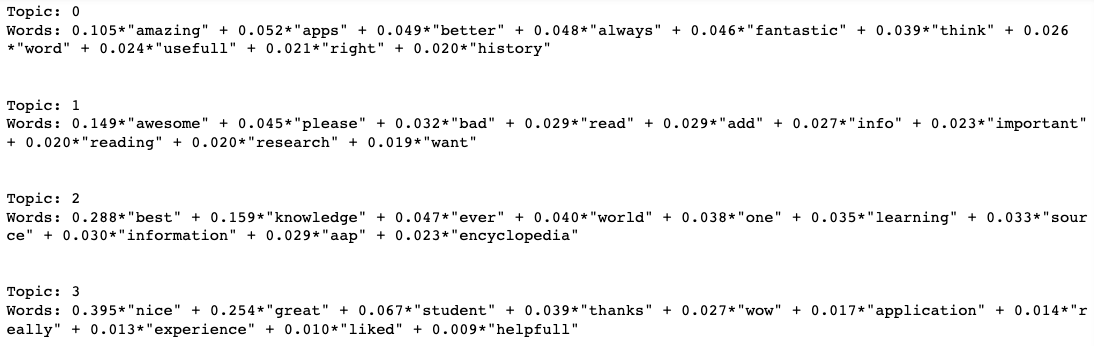

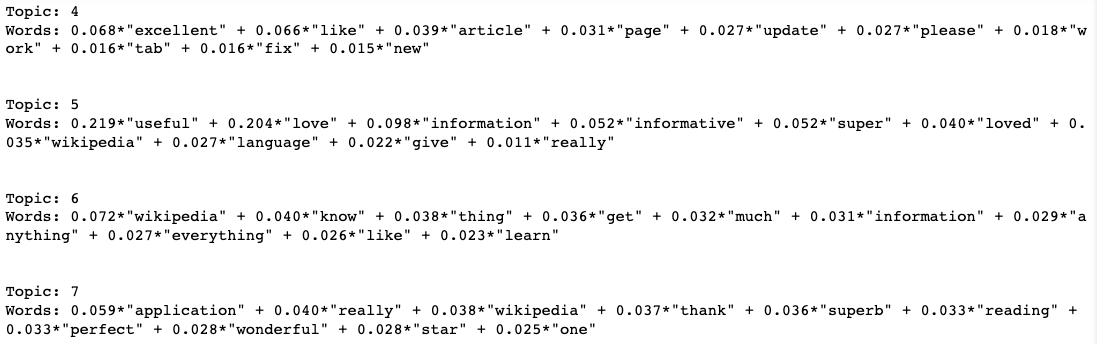

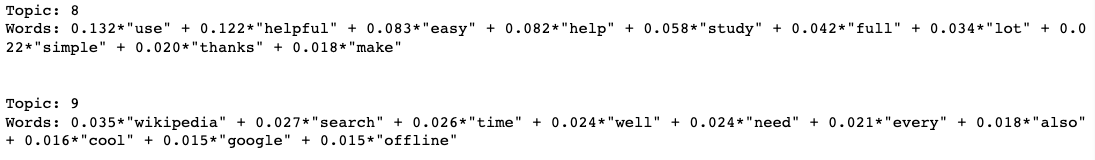

In [500]:
#Task 4 (continued):
#I. I chose the app Wikipedia (id=org.wikipedia) as it had the highest number of reviews


#II. The following is a list of 10 topics I was able to extract based on app's reviews:
#   0. Amazing/Useful App 
#   1. Reading/Research
#   2. (Open) Source Encyclopedia
#   3. Great for Students 
#   4. Excellent Articles
#   5. Languages
#   6. Wikipedia Learn Information
#   7. Wikipedia Reading
#   8. Easy / Simple 
#   9. Wikipedia Offline / Search


#III. Many of the topics I was able to extract from the reviews related closely to software features/functionalities 
#that I extracted from the app descriptions in Lab 2 and the bi-grams/tri-grams. Here are some of the similarities I 
#found, first I will list the extracted feature then the feature from the app description (Lab 2):

#1.Extracted: Open source encyclopedia,
#App Description: Free and Open Encyclopedia (100% open source)/No Ads

#2.Extracted: Languages, 
#App Description: Read in your language (300 languages to choose from)

#3.Extracted: Wikipedia Offline, 
#App Description: Use it Offline (read Wikipedia offline)

#4.Extracted: Search, 
#App Description: Find and Search for articles

#5.Extracted: Reading/Research, 
#App Description: Reading Articles

#Overall, I was able to extract quite a few topics that had similar if not identical matches to the features listed 
#in the app description in the Google Play Store. I also noticed that, since these are reviews there are many words 
#praising the app that are unrelated to specific features such as "amazing, wonderful, fantastic, great, thanks". 
#Since these are app reviews, this is expected however, these words are unrelated to features in the app description.
#These topics referenced some of the app features almost directly but since these are just topics, not as much
#detail about the features was extracted. For example, in actual app features goes into more detail about the 
#feature. I also noticed that the more compound features were missing from the topics like 'Voice-Integrated 
#Search' as the LDA model did not manage to group together these terms based on user reviews alone. A possible
#explanation is that the words voice intergrated search may not have been directly used in the reviews. The 
#reviewer's may have just mentioned voice search or did not make use/reference this feature all together. 

#I also noticed that there were some similarities to the bi-grams (from Lab 2) but as much overlap as I would have 
#thought. The bi-grams were very inclusive of all the application features and did not miss many features. 
#This LDA model only managed to capture about 50-60% of features. A reason for this is likely, that the bi-grams 
#were constructed directly from the app descrition which included the actual features while the LDA model is 
#constructed using user reviews that may have not listed every feature.


#IV. Note: 3 (RandomWiki, WikiRace, WikipediaAPI) of the competitor/similar apps did not have enough reviews to 
#create a dictionary and run LDA. For that reason they were not included. A table of topics/outputs for Each app
#(similar/competitor) is included below.


#V. For Assigned App #2 (Quora) the topics were quite accurate when compared to the app description. For example
#Question and Answer came up versus the app description which contained "Ask as question and get helpful answers".
#I did still find that my chosen app, Wikipedia, produced the most overlap when comparing extracted topics to 
#description topics, the reason for this could be the large sample size of reviews. In terms of similarities
#between topics for Wikipedia and Quora, there were some like Open, Learning, and Knowledge. These 
#were topis that I found to be similar between these two apps specifically. Quora mentioned Social Content and 
#Question Answer, these were key differences as Wikipedia does not even list these as features so that seems
#to be accurate.

#For the remaing apps heres what I found:
#In terms of differences, there were a few topics that stood out and were completely different from those 
#extracted from my chosen app. For example, one of the topics was related to Battery Usage(id=com.instapaper.android).
#This was not a topic that came up when analysing my chosen app. Another app called Wikipedia Commons had a few topics
#related to photos/images. Again this was not a topic or feature listed in the Wikipedia app. This is expected 
#as all of these Assigned Apps are not the exact same so they likely have some features that are different.

#For all the apps overall there were many that had a lot of similar features after topic extraction which is 
#to be expected as all these apps do very similar things and are either competitor apps or similar apps. 
#For example, offline reading was a very common topic, so was reading wikipedia articles, and 
#free/open source were also topics that occurred very often across the different Assigned Apps's topics.

In [501]:
#Task 4 - IV (saved outputs of topics for Each competitor/similar app separately):
quoraTopics=['Knowledge','Open','Social Content','Help Learn','Question Answer']

display(pddd.DataFrame(quoraTopics, columns=["Quora Topics"]))

,Quora Topics
0,Knowledge
1,Open
2,Social Content
3,Help Learn
4,Question Answer


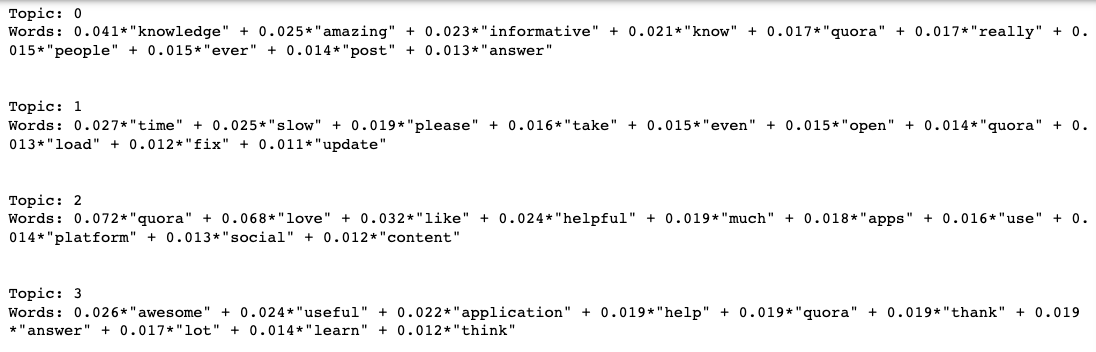

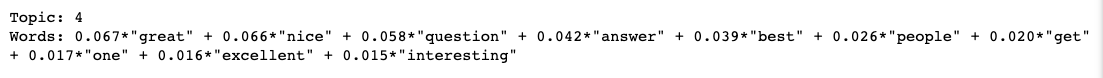

In [502]:
kiwixTopics=['Use Wikipedia Without Internet','Size','Offline Wikipedia','Search','Download']

display(pdd.DataFrame(kiwixTopics, columns=["Kiwix Topics"]))

,Kiwix Topics
0,Use Wikipedia Without Internet
1,Size
2,Offline Wikipedia
3,Search
4,Download


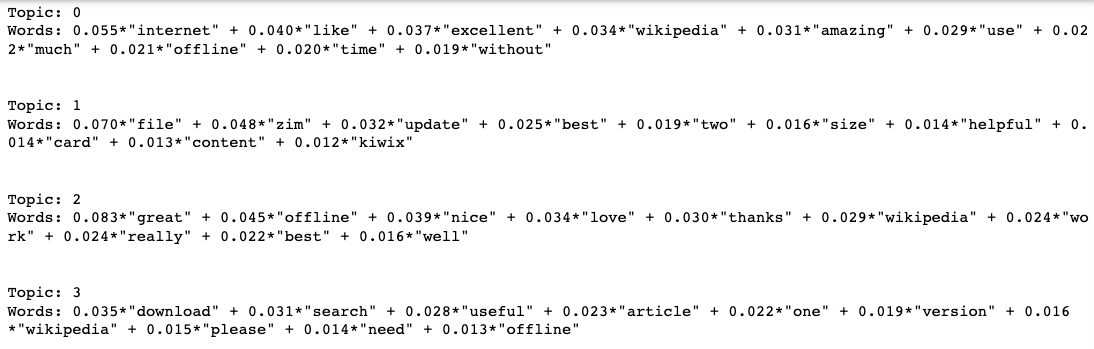

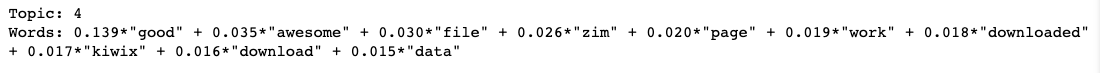

In [503]:
instapaperTopics=['Read/Save Articles','Text view','Android Version','Battery Usage','Free']

display(pdd.DataFrame(instapaperTopics, columns=["Instapaper Topics"]))

,Instapaper Topics
0,Read/Save Articles
1,Text view
2,Android Version
3,Battery Usage
4,Free


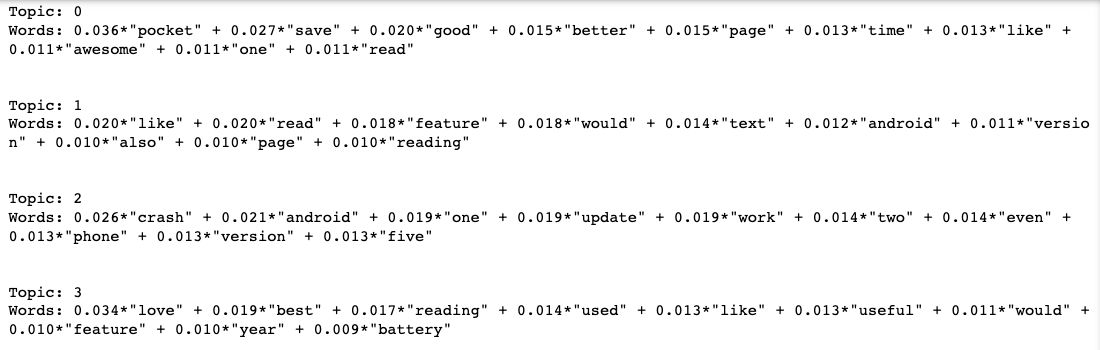

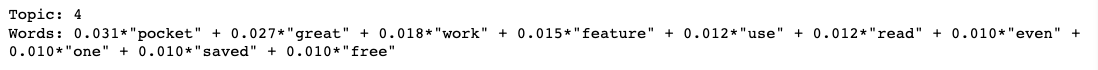

In [504]:
everyWikiTopics=['Search Wikipedia','Reading Wikipedia Offline','Browse Wikipedia','Articles and Images','Themes']

display(pdd.DataFrame(everyWikiTopics, columns=["EveryWiki Topics"]))

,EveryWiki Topics
0,Search Wikipedia
1,Reading Wikipedia Offline
2,Browse Wikipedia
3,Articles and Images
4,Themes


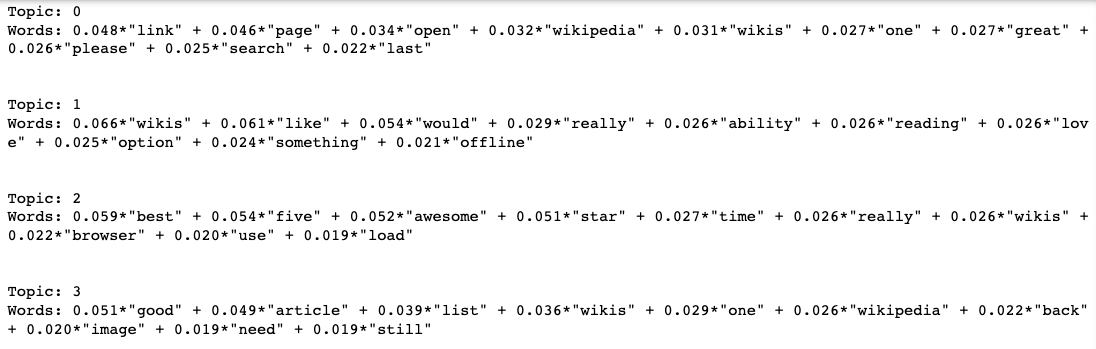

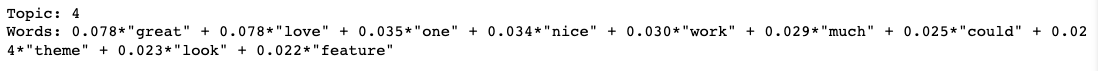

In [505]:
wikiMasterTopics=['Knowledge Game','Learning Quizzes','Fun Quizzes','Questions','Learning with Questions/Quizzes']

display(pdd.DataFrame(wikiMasterTopics, columns=["WikiMaster Topics"]))

,WikiMaster Topics
0,Knowledge Game
1,Learning Quizzes
2,Fun Quizzes
3,Questions
4,Learning with Questions/Quizzes


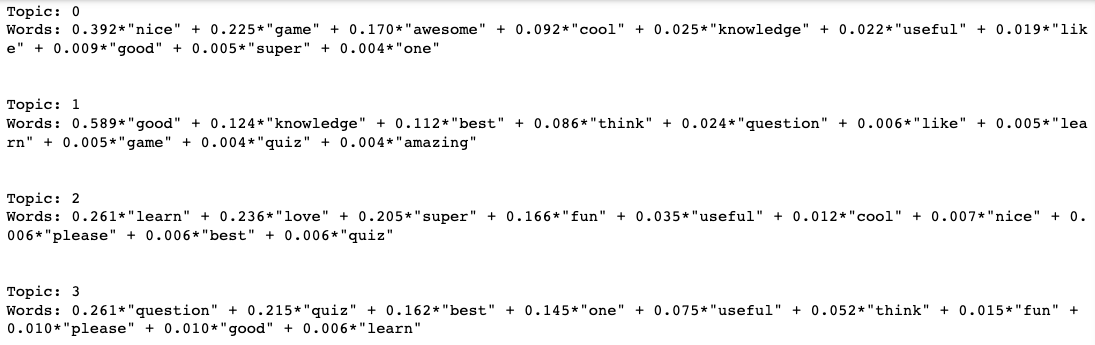

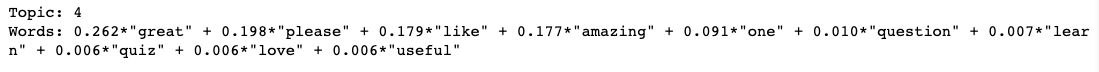

In [506]:
encyclopediaFarlexTopics=['Learning Application','Offline Reference','Search','Information/Knowledge','Informative Encyclopedia']

display(pdd.DataFrame(encyclopediaFarlexTopics, columns=["Encyclopedia Farlex Topics"]))

,Encyclopedia Farlex Topics
0,Learning Application
1,Offline Reference
2,Search
3,Information/Knowledge
4,Informative Encyclopedia


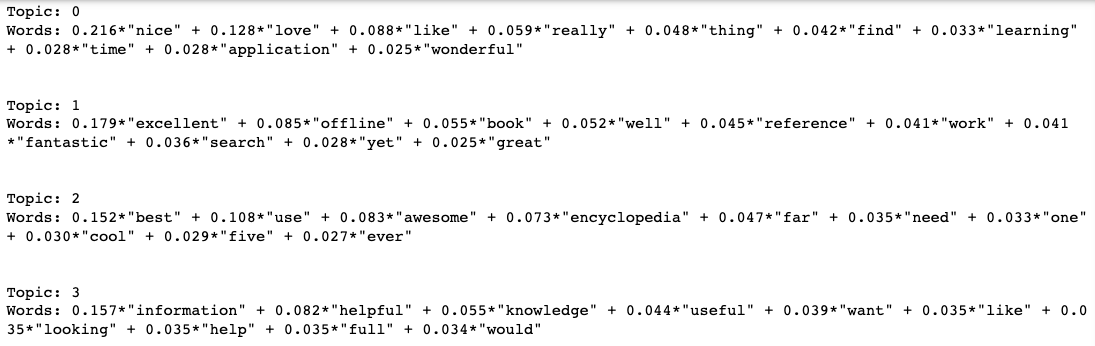

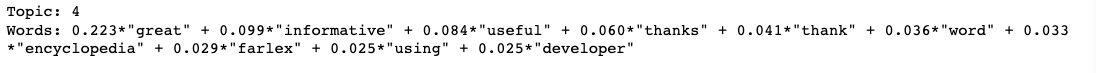

In [507]:
wikimediaCommonsTopics=['Upload Images','Upload Photos','Find Pictures','Login to account','Use Wikipedia']

display(pdd.DataFrame(wikimediaCommonsTopics, columns=["Wikimedia Commons Topics"]))

,Wikimedia Commons Topics
0,Upload Images
1,Upload Photos
2,Find Pictures
3,Login to account
4,Use Wikipedia


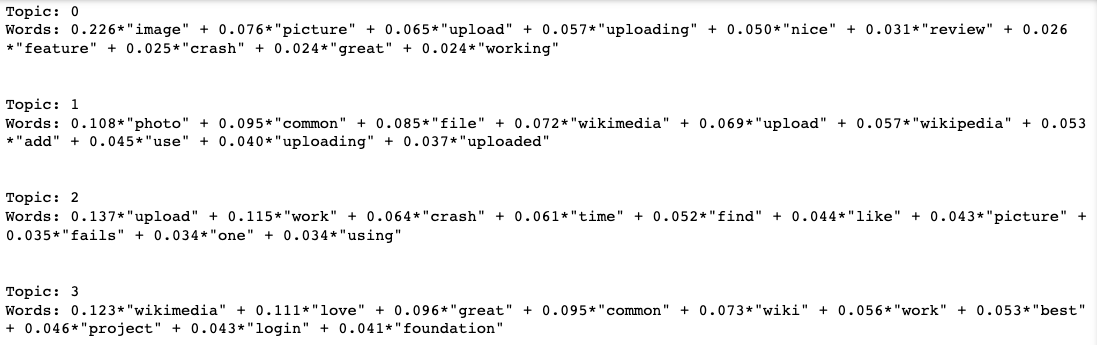

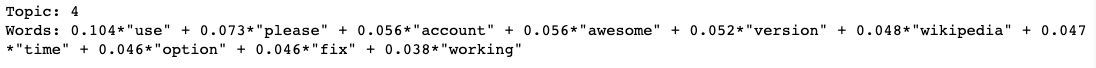

In [515]:
#BONUS for TASK 4: 
#I.Retrieve the Topic for each review of Assigned App (id=org.wikipedia)

import gensim
from gensim import corpora

listForTable=[]

x= (len(df))
for ii in range(0, (x-1)):
    corpus = []
    text = str(df['ReviewerText'].iloc[ii])
    text = ' '.join([w for w in text.split() if len(w)>0])
    if (len(text)<1):
        text = 'NONE'
    corpus.append(text)

    clean_corpus = [word.split() for word in corpus]

    dict_ = corpora.Dictionary(clean_corpus)

    doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus]

    Lda = gensim.models.ldamodel.LdaModel

    ldamodel = Lda(doc_term_matrix, num_topics=1, id2word = dict_, passes=1, random_state=0, eval_every=None)

    print(ldamodel.print_topics(num_topics=1, num_words=1))

[(0, '0.250*"turkey"')]
[(0, '1.000*"NONE"')]
[(0, '0.500*"offline"')]
[(0, '0.333*"information"')]
[(0, '0.500*"app"')]
[(0, '0.333*"chalta"')]
[(0, '0.333*"friend"')]
[(0, '0.250*"information"')]
[(0, '0.136*"one"')]
[(0, '0.067*"american"')]
[(0, '0.200*"careful"')]
[(0, '0.136*"u"')]
[(0, '0.100*"back"')]
[(0, '0.143*"app"')]
[(0, '0.088*"love"')]
[(0, '0.500*"app"')]
[(0, '0.167*"contain"')]
[(0, '1.000*"trust"')]
[(0, '0.063*"two"')]
[(0, '0.333*"account"')]
[(0, '0.333*"good"')]
[(0, '0.091*"app"')]
[(0, '0.333*"helpful"')]
[(0, '0.167*"done"')]
[(0, '0.333*"fox"')]
[(0, '0.200*"find"')]
[(0, '1.000*"informative"')]
[(0, '0.333*"go"')]
[(0, '0.250*"ime"')]
[(0, '0.500*"app"')]
[(0, '1.000*"good"')]
[(0, '1.000*"good"')]
[(0, '0.083*"android"')]
[(0, '0.167*"app"')]
[(0, '0.200*"area"')]
[(0, '0.200*"geldin"')]
[(0, '0.143*"app"')]
[(0, '0.081*"wikipedia"')]
[(0, '1.000*"NONE"')]
[(0, '1.000*"nice"')]
[(0, '0.250*"important"')]
[(0, '0.500*"md"')]
[(0, '1.000*"great"')]
[(0, '0.3

[(0, '0.143*"accurate"')]
[(0, '0.500*"starting"')]
[(0, '1.000*"good"')]
[(0, '1.000*"NONE"')]
[(0, '1.000*"useful"')]
[(0, '0.500*"fake"')]
[(0, '0.500*"excellncy"')]
[(0, '0.056*"tiny"')]
[(0, '1.000*"good"')]
[(0, '0.250*"platform"')]
[(0, '0.333*"app"')]
[(0, '0.094*"app"')]
[(0, '0.500*"app"')]
[(0, '0.250*"ok"')]
[(0, '1.000*"good"')]
[(0, '0.250*"app"')]
[(0, '0.500*"bad"')]
[(0, '1.000*"like"')]
[(0, '1.000*"amazing"')]
[(0, '1.000*"informative"')]
[(0, '1.000*"nice"')]
[(0, '0.500*"information"')]
[(0, '1.000*"great"')]
[(0, '0.053*"sony"')]
[(0, '0.250*"tip"')]
[(0, '0.333*"apps"')]
[(0, '0.500*"like"')]
[(0, '0.500*"good"')]
[(0, '0.333*"full"')]
[(0, '0.500*"app"')]
[(0, '0.100*"everything"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '0.071*"advantage"')]
[(0, '1.000*"thncks"')]
[(0, '0.500*"package"')]
[(0, '0.250*"wikipedia"')]
[(0, '1.000*"ok"')]
[(0, '1.000*"NONE"')]
[(0, '0.500*"app"')]
[(0, '1.000*"good"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"zrdx"')]
[(0, '0.0

[(0, '0.333*"awesome"')]
[(0, '0.100*"android"')]
[(0, '0.333*"good"')]
[(0, '0.176*"language"')]
[(0, '1.000*"usable"')]
[(0, '0.500*"app"')]
[(0, '0.250*"good"')]
[(0, '0.333*"best"')]
[(0, '0.190*"app"')]
[(0, '0.500*"app"')]
[(0, '1.000*"awesome"')]
[(0, '0.167*"absolutely"')]
[(0, '0.167*"one"')]
[(0, '1.000*"excellent"')]
[(0, '1.000*"dikeshsen"')]
[(0, '0.333*"app"')]
[(0, '1.000*"good"')]
[(0, '0.059*"topic"')]
[(0, '1.000*"good"')]
[(0, '0.250*"helpful"')]
[(0, '1.000*"good"')]
[(0, '0.083*"add"')]
[(0, '0.500*"app"')]
[(0, '0.125*"car"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '1.000*"offline"')]
[(0, '1.000*"good"')]
[(0, '1.000*"best"')]
[(0, '1.000*"NONE"')]
[(0, '1.000*"excellent"')]
[(0, '1.000*"kudu"')]
[(0, '1.000*"cute"')]
[(0, '0.500*"app"')]
[(0, '1.000*"superb"')]
[(0, '1.000*"excellent"')]
[(0, '0.176*"app"')]
[(0, '0.500*"awesome"')]
[(0, '0.086*"app"')]
[(0, '0.200*"bug"')]
[(0, '0.200*"app"')]
[(0, '0.143*"choice"')]
[(0, '1.000*"good"')]
[(0, '1.000*"

[(0, '1.000*"exceptional"')]
[(0, '1.000*"good"')]
[(0, '0.250*"smatly"')]
[(0, '1.000*"trustable"')]
[(0, '1.000*"osam"')]
[(0, '1.000*"super"')]
[(0, '0.333*"app"')]
[(0, '0.500*"app"')]
[(0, '0.103*"information"')]
[(0, '0.500*"app"')]
[(0, '1.000*"bad"')]
[(0, '0.500*"child"')]
[(0, '0.077*"app"')]
[(0, '0.500*"app"')]
[(0, '0.333*"app"')]
[(0, '0.250*"wikipedian"')]
[(0, '1.000*"love"')]
[(0, '0.231*"application"')]
[(0, '0.058*"amazing"')]
[(0, '0.167*"day"')]
[(0, '0.125*"doesnt"')]
[(0, '1.000*"useful"')]
[(0, '1.000*"helping"')]
[(0, '1.000*"best"')]
[(0, '0.200*"find"')]
[(0, '0.500*"app"')]
[(0, '1.000*"great"')]
[(0, '1.000*"great"')]
[(0, '0.111*"favorite"')]
[(0, '0.250*"nothing"')]
[(0, '1.000*"best"')]
[(0, '0.083*"algo"')]
[(0, '0.250*"love"')]
[(0, '0.500*"app"')]
[(0, '0.066*"wiki"')]
[(0, '1.000*"free"')]
[(0, '0.500*"learning"')]
[(0, '1.000*"NONE"')]
[(0, '0.333*"dekhenge"')]
[(0, '0.500*"detailed"')]
[(0, '0.091*"fast"')]
[(0, '0.167*"app"')]
[(0, '0.125*"app"')]

[(0, '0.500*"fantastic"')]
[(0, '1.000*"good"')]
[(0, '0.333*"best"')]
[(0, '1.000*"good"')]
[(0, '0.125*"detail"')]
[(0, '0.333*"help"')]
[(0, '1.000*"wowww"')]
[(0, '1.000*"excellent"')]
[(0, '1.000*"good"')]
[(0, '0.077*"bar"')]
[(0, '1.000*"NONE"')]
[(0, '1.000*"best"')]
[(0, '1.000*"love"')]
[(0, '1.000*"superb"')]
[(0, '0.200*"good"')]
[(0, '0.333*"app"')]
[(0, '0.100*"app"')]
[(0, '0.111*"apps"')]
[(0, '0.083*"app"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"nice"')]
[(0, '0.500*"hulisani"')]
[(0, '1.000*"amazing"')]
[(0, '0.500*"thank"')]
[(0, '0.500*"brilliant"')]
[(0, '0.200*"app"')]
[(0, '0.250*"know"')]
[(0, '0.500*"app"')]
[(0, '0.500*"app"')]
[(0, '0.085*"change"')]
[(0, '0.500*"excellent"')]
[(0, '1.000*"good"')]
[(0, '0.071*"app"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"like"')]
[(0, '0.500*"app"')]
[(0, '0.500*"best"')]
[(0, '1.000*"awesome"')]
[(0, '0.333*"every"')]
[(0, '1.000*"good"')]
[(0, '0.200*"app"')]
[(0, '1.000*"interesting"')]
[(0, '1.000*"wow"')]
[(0, '0.250*"search

[(0, '0.200*"city"')]
[(0, '0.500*"app"')]
[(0, '0.125*"comprehensive"')]
[(0, '0.231*"bless"')]
[(0, '0.065*"shivaji"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '0.111*"amount"')]
[(0, '0.250*"want"')]
[(0, '0.500*"dev"')]
[(0, '0.500*"fine"')]
[(0, '0.500*"app"')]
[(0, '1.000*"NONE"')]
[(0, '0.077*"right"')]
[(0, '1.000*"love"')]
[(0, '0.250*"waaawa"')]
[(0, '0.200*"answer"')]
[(0, '1.000*"great"')]
[(0, '1.000*"awesome"')]
[(0, '0.100*"accessible"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"great"')]
[(0, '0.053*"much"')]
[(0, '1.000*"well"')]
[(0, '0.333*"application"')]
[(0, '0.250*"use"')]
[(0, '1.000*"great"')]
[(0, '0.500*"app"')]
[(0, '1.000*"great"')]
[(0, '0.091*"gift"')]
[(0, '0.333*"app"')]
[(0, '0.167*"cite"')]
[(0, '1.000*"best"')]
[(0, '1.000*"cool"')]
[(0, '0.100*"keep"')]
[(0, '0.333*"aap"')]
[(0, '0.167*"account"')]
[(0, '1.000*"like"')]
[(0, '1.000*"good"')]
[(0, '0.500*"best"')]
[(0, '1.000*"best"')]
[(0, '0.333*"app"')]
[(0, '0.500*"apps"')]
[(0, '0.333*"app"')]

[(0, '1.000*"NONE"')]
[(0, '0.500*"app"')]
[(0, '0.035*"individual"')]
[(0, '0.071*"app"')]
[(0, '0.500*"like"')]
[(0, '0.054*"free"')]
[(0, '0.143*"app"')]
[(0, '0.333*"app"')]
[(0, '0.250*"good"')]
[(0, '1.000*"awesome"')]
[(0, '0.600*"la"')]
[(0, '0.077*"app"')]
[(0, '0.250*"know"')]
[(0, '0.200*"cant"')]
[(0, '0.333*"apps"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"perfect"')]
[(0, '1.000*"ooo"')]
[(0, '1.000*"best"')]
[(0, '0.500*"connect"')]
[(0, '0.067*"almost"')]
[(0, '0.200*"boring"')]
[(0, '0.250*"thanks"')]
[(0, '0.200*"anything"')]
[(0, '0.250*"article"')]
[(0, '0.500*"good"')]
[(0, '0.250*"tab"')]
[(0, '1.000*"bad"')]
[(0, '1.000*"educative"')]
[(0, '0.500*"installing"')]
[(0, '0.125*"app"')]
[(0, '0.500*"app"')]
[(0, '0.500*"app"')]
[(0, '1.000*"good"')]
[(0, '0.167*"app"')]
[(0, '0.500*"good"')]
[(0, '0.500*"good"')]
[(0, '0.200*"app"')]
[(0, '1.000*"good"')]
[(0, '1.000*"excellent"')]
[(0, '0.500*"extra"')]
[(0, '0.100*"almost"')]
[(0, '1.000*"osm"')]
[(0, '1.000*"helpful"')

[(0, '0.035*"political"')]
[(0, '0.120*"page"')]
[(0, '1.000*"good"')]
[(0, '0.071*"browser"')]
[(0, '0.200*"app"')]
[(0, '0.200*"collaboration"')]
[(0, '0.500*"excellent"')]
[(0, '0.089*"account"')]
[(0, '0.500*"app"')]
[(0, '1.000*"nice"')]
[(0, '0.333*"app"')]
[(0, '1.000*"least"')]
[(0, '0.500*"goo"')]
[(0, '1.000*"satisfied"')]
[(0, '0.042*"headline"')]
[(0, '1.000*"best"')]
[(0, '1.000*"good"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '0.333*"almost"')]
[(0, '1.000*"good"')]
[(0, '0.250*"way"')]
[(0, '1.000*"wow"')]
[(0, '0.500*"good"')]
[(0, '1.000*"NONE"')]
[(0, '0.250*"nearly"')]
[(0, '0.250*"life"')]
[(0, '0.250*"good"')]
[(0, '0.333*"app"')]
[(0, '0.500*"app"')]
[(0, '0.500*"c"')]
[(0, '0.200*"app"')]
[(0, '0.200*"captcha"')]
[(0, '0.273*"app"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '0.167*"app"')]
[(0, '1.000*"excellent"')]
[(0, '0.100*"app"')]
[(0, '0.500*"aap"')]
[(0, '0.500*"learning"')]
[(0, '0.333*"app"')]
[(0, '0.250*"bahat"')]

[(0, '0.333*"full"')]
[(0, '0.250*"option"')]
[(0, '0.033*"app"')]
[(0, '1.000*"good"')]
[(0, '1.000*"love"')]
[(0, '0.250*"multicolour"')]
[(0, '0.250*"mechanism"')]
[(0, '0.091*"new"')]
[(0, '1.000*"good"')]
[(0, '0.091*"account"')]
[(0, '0.250*"public"')]
[(0, '0.500*"haii"')]
[(0, '0.333*"account"')]
[(0, '0.500*"app"')]
[(0, '0.125*"app"')]
[(0, '0.500*"app"')]
[(0, '0.111*"app"')]
[(0, '0.500*"great"')]
[(0, '1.000*"good"')]
[(0, '1.000*"good"')]
[(0, '0.500*"math"')]
[(0, '0.091*"new"')]
[(0, '0.500*"app"')]
[(0, '1.000*"good"')]
[(0, '1.000*"good"')]
[(0, '0.100*"captcha"')]
[(0, '0.250*"properly"')]
[(0, '0.052*"new"')]
[(0, '0.500*"acha"')]
[(0, '0.333*"many"')]
[(0, '0.250*"much"')]
[(0, '0.333*"app"')]
[(0, '0.075*"new"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '1.000*"excellent"')]
[(0, '1.000*"helpful"')]
[(0, '0.097*"information"')]
[(0, '0.333*"app"')]
[(0, '0.500*"app"')]
[(0, '1.000*"good"')]
[(0, '0.250*"really"')]
[(0, '0.167*"app"')]
[(0, '1.000*"good"')]


[(0, '0.143*"dark"')]
[(0, '0.176*"app"')]
[(0, '0.100*"blank"')]
[(0, '0.333*"app"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '0.500*"app"')]
[(0, '0.200*"donate"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '0.500*"awesome"')]
[(0, '0.500*"article"')]
[(0, '0.200*"able"')]
[(0, '0.333*"easy"')]
[(0, '0.500*"app"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"useful"')]
[(0, '0.200*"bias"')]
[(0, '0.250*"knowledge"')]
[(0, '1.000*"NONE"')]
[(0, '0.333*"app"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"awesome"')]
[(0, '0.056*"saying"')]
[(0, '0.143*"alt"')]
[(0, '0.080*"unreadable"')]
[(0, '1.000*"superb"')]
[(0, '0.500*"khub"')]
[(0, '0.333*"bye"')]
[(0, '0.250*"radio"')]
[(0, '0.500*"best"')]
[(0, '0.250*"information"')]
[(0, '1.000*"good"')]
[(0, '0.500*"knowledge"')]
[(0, '0.500*"app"')]
[(0, '0.158*"app"')]
[(0, '0.333*"please"')]
[(0, '0.086*"good"')]
[(0, '1.000*"nice"')]
[(0, '0.200*"app"')]
[(0, '0.200*"app"')]
[(0, '0.500*"bad"')]
[(0, '1.000*"nice"')]
[(0, '0.333*"app"')]
[(0

[(0, '0.500*"good"')]
[(0, '0.333*"amazing"')]
[(0, '0.091*"directly"')]
[(0, '1.000*"good"')]
[(0, '1.000*"ok"')]
[(0, '1.000*"awesome"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"super"')]
[(0, '1.000*"ok"')]
[(0, '0.500*"best"')]
[(0, '1.000*"okay"')]
[(0, '1.000*"best"')]
[(0, '0.333*"app"')]
[(0, '1.000*"awesome"')]
[(0, '0.167*"app"')]
[(0, '1.000*"helpful"')]
[(0, '0.500*"information"')]
[(0, '0.500*"app"')]
[(0, '1.000*"well"')]
[(0, '0.333*"getting"')]
[(0, '1.000*"nooo"')]
[(0, '0.500*"donate"')]
[(0, '0.500*"app"')]
[(0, '0.333*"almost"')]
[(0, '0.500*"aap"')]
[(0, '0.200*"app"')]
[(0, '0.200*"amount"')]
[(0, '0.111*"article"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '1.000*"okkk"')]
[(0, '1.000*"super"')]
[(0, '1.000*"nice"')]
[(0, '0.250*"knowledge"')]
[(0, '1.000*"nice"')]
[(0, '0.500*"app"')]
[(0, '0.333*"great"')]
[(0, '1.000*"well"')]
[(0, '0.167*"application"')]
[(0, '0.500*"blowing"')]
[(0, '0.167*"amazing"')]
[(0, '0.190*"wikipedia"')]
[(0, '0.333*"educational"')

[(0, '0.176*"search"')]
[(0, '0.500*"application"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"awsome"')]
[(0, '1.000*"helpful"')]
[(0, '0.250*"know"')]
[(0, '0.333*"helpful"')]
[(0, '1.000*"informative"')]
[(0, '0.500*"like"')]
[(0, '0.500*"app"')]
[(0, '0.500*"best"')]
[(0, '0.600*"app"')]
[(0, '0.500*"app"')]
[(0, '0.333*"also"')]
[(0, '0.333*"app"')]
[(0, '0.500*"app"')]
[(0, '0.500*"app"')]
[(0, '1.000*"nyc"')]
[(0, '0.143*"app"')]
[(0, '0.250*"love"')]
[(0, '0.075*"update"')]
[(0, '0.200*"app"')]
[(0, '0.500*"app"')]
[(0, '1.000*"good"')]
[(0, '0.125*"better"')]
[(0, '0.111*"app"')]
[(0, '0.500*"good"')]
[(0, '0.055*"screen"')]
[(0, '1.000*"excellent"')]
[(0, '0.500*"app"')]
[(0, '0.200*"application"')]
[(0, '0.068*"app"')]
[(0, '0.500*"app"')]
[(0, '0.500*"apps"')]
[(0, '0.059*"bar"')]
[(0, '0.500*"make"')]
[(0, '1.000*"NONE"')]
[(0, '0.500*"detail"')]
[(0, '0.200*"helpful"')]
[(0, '1.000*"thanks"')]
[(0, '0.167*"file"')]
[(0, '0.333*"app"')]
[(0, '1.000*"nice"')]
[(0, '0.500*"love"')]

[(0, '0.250*"without"')]
[(0, '0.500*"fabulous"')]
[(0, '0.100*"actually"')]
[(0, '0.500*"good"')]
[(0, '1.000*"best"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '1.000*"love"')]
[(0, '1.000*"perfect"')]
[(0, '1.000*"good"')]
[(0, '1.000*"good"')]
[(0, '1.000*"loveing"')]
[(0, '0.333*"fine"')]
[(0, '0.500*"app"')]
[(0, '1.000*"useful"')]
[(0, '1.000*"good"')]
[(0, '0.500*"love"')]
[(0, '0.111*"application"')]
[(0, '0.333*"enough"')]
[(0, '0.500*"app"')]
[(0, '1.000*"good"')]
[(0, '0.500*"good"')]
[(0, '0.500*"app"')]
[(0, '0.250*"reading"')]
[(0, '1.000*"NONE"')]
[(0, '1.000*"helpful"')]
[(0, '0.500*"apps"')]
[(0, '0.500*"handy"')]
[(0, '0.500*"amazing"')]
[(0, '0.250*"learn"')]
[(0, '1.000*"NONE"')]
[(0, '0.500*"great"')]
[(0, '0.429*"app"')]
[(0, '1.000*"help"')]
[(0, '1.000*"awesome"')]
[(0, '0.500*"app"')]
[(0, '1.000*"good"')]
[(0, '0.231*"wikipedia"')]
[(0, '0.250*"website"')]
[(0, '0.333*"reference"')]
[(0, '0.500*"nice"')]
[(0, '0.500*"much"')]
[(0, '0.500*"great"')]
[(0

[(0, '0.333*"application"')]
[(0, '0.143*"complain"')]
[(0, '1.000*"perfect"')]
[(0, '1.000*"good"')]
[(0, '1.000*"good"')]
[(0, '1.000*"awesome"')]
[(0, '0.136*"great"')]
[(0, '0.500*"nice"')]
[(0, '0.250*"offline"')]
[(0, '0.250*"nice"')]
[(0, '0.333*"government"')]
[(0, '0.091*"five"')]
[(0, '0.176*"download"')]
[(0, '0.333*"add"')]
[(0, '0.200*"appp"')]
[(0, '0.250*"website"')]
[(0, '1.000*"love"')]
[(0, '1.000*"valuable"')]
[(0, '1.000*"good"')]
[(0, '0.500*"application"')]
[(0, '0.500*"fantasy"')]
[(0, '0.250*"may"')]
[(0, '1.000*"grate"')]
[(0, '1.000*"gzb"')]
[(0, '1.000*"super"')]
[(0, '1.000*"nice"')]
[(0, '0.250*"knowledge"')]
[(0, '0.500*"apk"')]
[(0, '0.200*"app"')]
[(0, '0.500*"way"')]
[(0, '0.200*"global"')]
[(0, '0.158*"good"')]
[(0, '1.000*"good"')]
[(0, '1.000*"amazing"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '1.000*"thank"')]
[(0, '1.000*"nice"')]
[(0, '0.176*"app"')]
[(0, '1.000*"nice"')]
[(0, '0.500*"app"')]
[(0, '0.176*"knowledge"')]
[(0, '0.500*"app"')

[(0, '0.500*"l"')]
[(0, '0.500*"aap"')]
[(0, '0.250*"quite"')]
[(0, '0.200*"almost"')]
[(0, '1.000*"good"')]
[(0, '0.333*"genral"')]
[(0, '1.000*"fabb"')]
[(0, '1.000*"great"')]
[(0, '1.000*"awesome"')]
[(0, '1.000*"love"')]
[(0, '0.500*"app"')]
[(0, '0.143*"app"')]
[(0, '1.000*"darun"')]
[(0, '0.111*"also"')]
[(0, '0.250*"gujarati"')]
[(0, '0.273*"hi"')]
[(0, '0.333*"app"')]
[(0, '0.333*"app"')]
[(0, '0.500*"app"')]
[(0, '0.500*"better"')]
[(0, '0.167*"app"')]
[(0, '0.083*"country"')]
[(0, '0.143*"app"')]
[(0, '1.000*"good"')]
[(0, '1.000*"thanks"')]
[(0, '0.200*"effort"')]
[(0, '0.130*"user"')]
[(0, '0.500*"nice"')]
[(0, '0.500*"app"')]
[(0, '0.125*"aap"')]
[(0, '0.500*"app"')]
[(0, '0.500*"knowledge"')]
[(0, '0.500*"app"')]
[(0, '1.000*"yes"')]
[(0, '1.000*"fantastic"')]
[(0, '0.333*"awesome"')]
[(0, '0.500*"gk"')]
[(0, '1.000*"mst"')]
[(0, '1.000*"good"')]
[(0, '0.200*"app"')]
[(0, '0.500*"app"')]
[(0, '0.200*"awesome"')]
[(0, '0.333*"app"')]
[(0, '0.500*"app"')]
[(0, '1.000*"tryin

[(0, '0.083*"wikipedia"')]
[(0, '1.000*"nice"')]
[(0, '0.500*"app"')]
[(0, '0.100*"better"')]
[(0, '0.500*"sachin"')]
[(0, '0.500*"app"')]
[(0, '1.000*"amazing"')]
[(0, '0.333*"help"')]
[(0, '0.500*"app"')]
[(0, '0.333*"dead"')]
[(0, '0.200*"easy"')]
[(0, '1.000*"good"')]
[(0, '0.143*"app"')]
[(0, '0.111*"buena"')]
[(0, '0.200*"best"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"useful"')]
[(0, '1.000*"haha"')]
[(0, '1.000*"like"')]
[(0, '1.000*"NONE"')]
[(0, '1.000*"good"')]
[(0, '1.000*"good"')]
[(0, '0.500*"absolutely"')]
[(0, '1.000*"good"')]
[(0, '0.231*"study"')]
[(0, '0.500*"nice"')]
[(0, '0.250*"n"')]
[(0, '0.143*"app"')]
[(0, '0.500*"app"')]
[(0, '0.333*"app"')]
[(0, '0.231*"thats"')]
[(0, '0.500*"love"')]
[(0, '0.250*"great"')]
[(0, '0.250*"nc"')]
[(0, '0.500*"et"')]
[(0, '1.000*"amazing"')]
[(0, '0.333*"app"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '1.000*"loved"')]
[(0, '0.200*"best"')]
[(0, '1.000*"nice"')]
[(0, '0.500*"app"')]
[(0, '0.333*"app"')]
[(0, '1.000*"mmmm"')]


[(0, '0.333*"ful"')]
[(0, '0.500*"app"')]
[(0, '0.143*"app"')]
[(0, '0.111*"app"')]
[(0, '0.250*"helpfull"')]
[(0, '1.000*"good"')]
[(0, '0.250*"fantastic"')]
[(0, '0.250*"nice"')]
[(0, '0.500*"fentastic"')]
[(0, '1.000*"good"')]
[(0, '0.158*"use"')]
[(0, '1.000*"NONE"')]
[(0, '1.000*"ok"')]
[(0, '1.000*"learn"')]
[(0, '0.500*"app"')]
[(0, '0.333*"app"')]
[(0, '0.333*"bookmark"')]
[(0, '0.088*"app"')]
[(0, '0.333*"knowledge"')]
[(0, '0.143*"informative"')]
[(0, '0.158*"search"')]
[(0, '1.000*"good"')]
[(0, '1.000*"writing"')]
[(0, '0.250*"know"')]
[(0, '0.250*"information"')]
[(0, '0.500*"app"')]
[(0, '0.085*"really"')]
[(0, '0.111*"device"')]
[(0, '1.000*"nic"')]
[(0, '0.500*"best"')]
[(0, '0.250*"mobile"')]
[(0, '0.100*"account"')]
[(0, '0.500*"app"')]
[(0, '0.143*"also"')]
[(0, '1.000*"nice"')]
[(0, '0.250*"information"')]
[(0, '1.000*"nice"')]
[(0, '0.333*"school"')]
[(0, '1.000*"good"')]
[(0, '0.500*"apps"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '0.500*"nice"')]
[(0, '0

[(0, '0.500*"app"')]
[(0, '0.500*"miss"')]
[(0, '0.333*"app"')]
[(0, '0.500*"e"')]
[(0, '1.000*"wikinvest"')]
[(0, '1.000*"excellent"')]
[(0, '0.500*"app"')]
[(0, '1.000*"jhakaaaaaas"')]
[(0, '0.200*"app"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"nice"')]
[(0, '0.500*"app"')]
[(0, '1.000*"gre"')]
[(0, '1.000*"NONE"')]
[(0, '0.500*"encyclopedia"')]
[(0, '0.250*"gaining"')]
[(0, '1.000*"NONE"')]
[(0, '1.000*"ok"')]
[(0, '0.200*"acknowledgement"')]
[(0, '0.500*"app"')]
[(0, '0.500*"thanks"')]
[(0, '0.500*"app"')]
[(0, '1.000*"intaligenttallanted"')]
[(0, '1.000*"wow"')]
[(0, '0.333*"better"')]
[(0, '1.000*"good"')]
[(0, '0.500*"brilliantlly"')]
[(0, '1.000*"love"')]
[(0, '1.000*"fantastic"')]
[(0, '1.000*"good"')]
[(0, '0.250*"popular"')]
[(0, '0.065*"episode"')]
[(0, '1.000*"usefull"')]
[(0, '0.167*"better"')]
[(0, '1.000*"nice"')]
[(0, '0.500*"awesome"')]
[(0, '0.500*"good"')]
[(0, '0.167*"app"')]
[(0, '1.000*"NONE"')]
[(0, '0.500*"app"')]
[(0, '1.000*"love"')]
[(0, '1.000*"great"')]
[(0, '

[(0, '0.200*"cause"')]
[(0, '0.500*"good"')]
[(0, '0.500*"app"')]
[(0, '0.500*"app"')]
[(0, '0.500*"best"')]
[(0, '0.500*"app"')]
[(0, '0.125*"application"')]
[(0, '1.000*"good"')]
[(0, '0.250*"love"')]
[(0, '0.130*"also"')]
[(0, '1.000*"good"')]
[(0, '1.000*"awesome"')]
[(0, '0.333*"app"')]
[(0, '0.500*"app"')]
[(0, '1.000*"nice"')]
[(0, '0.333*"app"')]
[(0, '0.500*"p"')]
[(0, '1.000*"fably"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '1.000*"yeeeees"')]
[(0, '0.167*"access"')]
[(0, '0.200*"ask"')]
[(0, '0.250*"helpful"')]
[(0, '0.167*"app"')]
[(0, '0.250*"ever"')]
[(0, '0.500*"app"')]
[(0, '1.000*"awesome"')]
[(0, '0.333*"need"')]
[(0, '1.000*"like"')]
[(0, '0.500*"born"')]
[(0, '0.250*"individual"')]
[(0, '0.500*"available"')]
[(0, '0.125*"app"')]
[(0, '1.000*"superb"')]
[(0, '1.000*"awsm"')]
[(0, '0.333*"give"')]
[(0, '1.000*"useful"')]
[(0, '0.333*"app"')]
[(0, '0.053*"fix"')]
[(0, '0.091*"app"')]
[(0, '0.333*"good"')]
[(0, '0.500*"image"')]
[(0, '1.000*"knowledgeable"')]
[

[(0, '0.500*"app"')]
[(0, '0.125*"anything"')]
[(0, '0.500*"good"')]
[(0, '1.000*"usefull"')]
[(0, '1.000*"good"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"nice"')]
[(0, '0.500*"aap"')]
[(0, '0.250*"old"')]
[(0, '1.000*"useful"')]
[(0, '1.000*"nice"')]
[(0, '0.143*"app"')]
[(0, '0.500*"app"')]
[(0, '0.500*"app"')]
[(0, '1.000*"NONE"')]
[(0, '1.000*"jagadeshwarner"')]
[(0, '0.083*"app"')]
[(0, '0.111*"crash"')]
[(0, '0.250*"play"')]
[(0, '1.000*"good"')]
[(0, '0.333*"app"')]
[(0, '0.250*"wikipedia"')]
[(0, '0.086*"wikipedia"')]
[(0, '0.250*"nat"')]
[(0, '1.000*"great"')]
[(0, '1.000*"well"')]
[(0, '0.500*"good"')]
[(0, '1.000*"useful"')]
[(0, '0.200*"app"')]
[(0, '1.000*"osm"')]
[(0, '1.000*"lovely"')]
[(0, '0.073*"another"')]
[(0, '0.500*"full"')]
[(0, '0.500*"help"')]
[(0, '0.500*"aap"')]
[(0, '1.000*"loved"')]
[(0, '0.500*"app"')]
[(0, '0.333*"app"')]
[(0, '0.333*"kaayu"')]
[(0, '0.500*"app"')]
[(0, '1.000*"fantastic"')]
[(0, '0.250*"new"')]
[(0, '0.250*"great"')]
[(

[(0, '0.500*"app"')]
[(0, '0.250*"know"')]
[(0, '1.000*"good"')]
[(0, '1.000*"best"')]
[(0, '0.500*"help"')]
[(0, '0.038*"notification"')]
[(0, '0.500*"great"')]
[(0, '0.167*"app"')]
[(0, '0.500*"app"')]
[(0, '1.000*"best"')]
[(0, '1.000*"excellent"')]
[(0, '0.429*"st"')]
[(0, '0.158*"revolution"')]
[(0, '0.200*"beta"')]
[(0, '0.111*"app"')]
[(0, '0.250*"ever"')]
[(0, '0.111*"equation"')]
[(0, '0.500*"good"')]
[(0, '0.250*"many"')]
[(0, '0.500*"crazy"')]
[(0, '1.000*"gd"')]
[(0, '0.333*"app"')]
[(0, '0.500*"easy"')]
[(0, '0.333*"aapp"')]
[(0, '0.333*"information"')]
[(0, '0.073*"app"')]
[(0, '0.500*"portable"')]
[(0, '0.214*"good"')]
[(0, '1.000*"use"')]
[(0, '1.000*"supper"')]
[(0, '1.000*"good"')]
[(0, '0.500*"nicr"')]
[(0, '0.333*"app"')]
[(0, '0.250*"productive"')]
[(0, '0.500*"best"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"good"')]
[(0, '0.250*"help"')]
[(0, '0.500*"perfect"')]
[(0, '0.333*"app"')]
[(0, '0.333*"app"')]
[(0, '0.143*"appp"')]
[(0, '0.250*"information"')]
[(0, '1.000*"b

[(0, '0.333*"app"')]
[(0, '0.500*"app"')]
[(0, '1.000*"smart"')]
[(0, '0.111*"app"')]
[(0, '0.500*"aplication"')]
[(0, '0.500*"app"')]
[(0, '1.000*"great"')]
[(0, '0.500*"app"')]
[(0, '0.250*"play"')]
[(0, '0.250*"provide"')]
[(0, '0.200*"five"')]
[(0, '0.250*"make"')]
[(0, '1.000*"lovely"')]
[(0, '0.176*"app"')]
[(0, '1.000*"good"')]
[(0, '0.111*"thanks"')]
[(0, '0.500*"excellent"')]
[(0, '1.000*"useful"')]
[(0, '0.111*"bug"')]
[(0, '0.250*"history"')]
[(0, '0.125*"app"')]
[(0, '0.500*"app"')]
[(0, '0.083*"app"')]
[(0, '0.111*"app"')]
[(0, '0.500*"alda"')]
[(0, '0.500*"friendly"')]
[(0, '0.200*"also"')]
[(0, '1.000*"good"')]
[(0, '0.500*"app"')]
[(0, '1.000*"good"')]
[(0, '0.273*"liked"')]
[(0, '1.000*"ok"')]
[(0, '1.000*"likeeeee"')]
[(0, '0.200*"add"')]
[(0, '1.000*"NONE"')]
[(0, '0.333*"better"')]
[(0, '0.500*"fast"')]
[(0, '0.333*"awesome"')]
[(0, '1.000*"fabulous"')]
[(0, '1.000*"nice"')]
[(0, '0.500*"app"')]
[(0, '1.000*"awesome"')]
[(0, '0.333*"guy"')]
[(0, '0.167*"application"

[(0, '0.500*"app"')]
[(0, '1.000*"good"')]
[(0, '0.333*"help"')]
[(0, '0.200*"app"')]
[(0, '0.500*"app"')]
[(0, '0.500*"amazing"')]
[(0, '0.250*"s6"')]
[(0, '0.250*"fabulous"')]
[(0, '0.200*"app"')]
[(0, '0.273*"app"')]
[(0, '0.333*"good"')]
[(0, '0.500*"app"')]
[(0, '1.000*"sexo"')]
[(0, '0.167*"bengali"')]
[(0, '0.043*"work"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"good"')]
[(0, '1.000*"awesome"')]
[(0, '0.167*"app"')]
[(0, '0.100*"ability"')]
[(0, '0.333*"install"')]
[(0, '0.333*"daughter"')]
[(0, '0.200*"download"')]
[(0, '1.000*"cool"')]
[(0, '1.000*"good"')]
[(0, '0.500*"aap"')]
[(0, '1.000*"nice"')]
[(0, '0.500*"app"')]
[(0, '0.200*"lovely"')]
[(0, '0.333*"awsmm"')]
[(0, '0.333*"always"')]
[(0, '1.000*"aap"')]
[(0, '1.000*"helpful"')]
[(0, '0.500*"encyclopaedia"')]
[(0, '1.000*"useful"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"NONE"')]
[(0, '0.333*"educational"')]
[(0, '1.000*"good"')]
[(0, '1.000*"best"')]
[(0, '0.500*"information"')]
[(0, '1.000*"awosom"')]
[(0, '1.000*"good"')]
[(0,

[(0, '0.500*"app"')]
[(0, '1.000*"thanks"')]
[(0, '1.000*"one"')]
[(0, '1.000*"super"')]
[(0, '0.167*"amazing"')]
[(0, '1.000*"useful"')]
[(0, '1.000*"loved"')]
[(0, '0.500*"good"')]
[(0, '1.000*"best"')]
[(0, '0.500*"alllllll"')]
[(0, '0.250*"knowledge"')]
[(0, '1.000*"helpful"')]
[(0, '0.500*"everything"')]
[(0, '0.333*"amazing"')]
[(0, '0.250*"u"')]
[(0, '1.000*"superb"')]
[(0, '0.333*"chahiye"')]
[(0, '1.000*"like"')]
[(0, '1.000*"good"')]
[(0, '1.000*"good"')]
[(0, '1.000*"nice"')]
[(0, '0.167*"account"')]
[(0, '0.500*"app"')]
[(0, '1.000*"super"')]
[(0, '0.115*"page"')]
[(0, '0.500*"app"')]
[(0, '0.083*"allow"')]
[(0, '1.000*"best"')]
[(0, '1.000*"loved"')]
[(0, '1.000*"nice"')]
[(0, '0.200*"app"')]
[(0, '0.500*"brain"')]
[(0, '1.000*"love"')]
[(0, '1.000*"useful"')]
[(0, '1.000*"well"')]
[(0, '1.000*"great"')]
[(0, '1.000*"ganesh"')]
[(0, '0.250*"education"')]
[(0, '0.500*"app"')]
[(0, '1.000*"good"')]
[(0, '0.250*"every"')]
[(0, '0.200*"deleted"')]
[(0, '0.500*"app"')]
[(0, '0.

[(0, '0.500*"app"')]
[(0, '1.000*"fantastic"')]
[(0, '1.000*"goooooooooooooooooooood"')]
[(0, '0.333*"amazing"')]
[(0, '0.500*"app"')]
[(0, '0.130*"app"')]
[(0, '1.000*"NONE"')]
[(0, '0.200*"good"')]
[(0, '1.000*"well"')]
[(0, '1.000*"NONE"')]
[(0, '1.000*"love"')]
[(0, '0.500*"bcz"')]
[(0, '0.333*"app"')]
[(0, '0.500*"love"')]
[(0, '0.200*"app"')]
[(0, '0.333*"easy"')]
[(0, '0.500*"information"')]
[(0, '0.250*"like"')]
[(0, '0.129*"app"')]
[(0, '0.083*"many"')]
[(0, '0.333*"fantastic"')]
[(0, '1.000*"best"')]
[(0, '1.000*"NONE"')]
[(0, '0.500*"app"')]
[(0, '0.500*"love"')]
[(0, '0.200*"anything"')]
[(0, '0.500*"app"')]
[(0, '1.000*"excellent"')]
[(0, '0.500*"app"')]
[(0, '0.158*"app"')]
[(0, '1.000*"NONE"')]
[(0, '1.000*"nice"')]
[(0, '1.000*"nice"')]
[(0, '0.111*"app"')]
[(0, '1.000*"useful"')]
[(0, '0.250*"seen"')]
[(0, '0.500*"app"')]
[(0, '1.000*"good"')]
[(0, '0.250*"great"')]
[(0, '0.200*"apps"')]
[(0, '1.000*"awesome"')]
[(0, '0.167*"build"')]
[(0, '0.429*"app"')]
[(0, '1.000*"

In [509]:
#BONUS for TASK 4 (continued):
#II.10 Reviews developers should take care of:
#1. Review #13: Feature Request - "1 star because Wikipedia removed my favorite feature: 'places'. Please bring it back!"
#2. Review #50: Bug - "When I have only trending turned on, it says "there's nothing on the explore feed" even though I have trending turned on."
#3. Review #56: Bug - "90% of the time images in articles don't load."
#4. Review #58: Feature Request - "translate english to khmer"
#5. Review #66: Bug - "i cant even create my new account"
#6. Review #69: Feature Request -  "I wish I could change the font of the articles.""
#7. Review #79: Feature Request - "Not option for text reader."
#8. Review #88: Bug - "tried to register but kept on giving me errors"
#9. Review #88: Bug - "All of a sudden, no images are loading on the app"
#10. Review #3040: Bug - "Text gets white background in dark mode. Can't read anything properly"

#I selected reviews based on things users complained about or specific features they asked for. If I noticed 
#A topic came up multiple times in reviews, I added a version of that to the topics listed above.
#I selected requested features/bugs that came up most often as these would help the most people if fixed by the 
#developers. For example, many reviews complained that they had trouble creating a new account. This should be a 
#priotity for developers to fix and if it is not an issue maybe make the process simpler or include better 
#instructions. 
#Many reviews also requested new language translations like "khmer". I also selected reviews that 
#had issues with loading because the developers should prioritize this as this is a key aspect of any 
#application. The request for changing text font was also a common request asked for by multiple users. 
#Overall, I took the number of times a feature or bug was the topic of the review as well as the score the 
#user rated the application into account when selecting the 10 reviews. If a feature was mentioned 
#by multiple users and the score was low (less than 3) then I chose to include it as one of the 
#10 reviews I selected. 

In [510]:
#Task5
#II.

#The two features/enhancements I would recommend are:

#1. Bug Fix: Font and Images not being displayed correctly in Dark Mode. 

#2. Bug Fix: Images not loading in application for some users.

#Some of my logic for how I came up with these recommendations is similar to that written above under 'Bonus for Task 4'.
#The two suggestions I chose are both Bug Fixes because many of the features requested by the users have either 
#already been added to the application or are in development (after looking at the issue tracking system). 
#The two suggestions I have are fixing the font and images not being displayed correctly in dark mode and images 
#not loading in the application. Both these features are important and key features when it comes to the application 
#usability. 
#I was able to come up with these bugs by using the LDA model to find topics based on the app reviews.
#From the topics, I had to look further into the actual reviews to verify exactly what the bug was. 
#I made my selection of these two bugs as they were both reported by multiple reviewers. These reviewers
#mentioned this bug, in different way and also tended to rate the application less than
#5 stars. By fixing these bugs the reviews should improve as users will not continue listing
#these issues in their reviews and reviewers will stop scoring the application less than 5 stars 
#(specifically due to these two bugs). 

In [ ]:
#Bonus of Task 5:

#Bug Report: Font being lost when switching to Dark Mode: (logic included in open issue below):
#https://phabricator.wikimedia.org/T324378

#Bug Report: Images not loading in application for some users: (logic included in open issue below):
#https://phabricator.wikimedia.org/T324532